# Лабораторная работа 2

## Полносвязная нейронная сеть

Реализовать нейронную сеть, состоящую из двух полносвязных слоев и решающую задачу классификации на наборе данных из лабораторной работы 1.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scripts.classifiers.neural_net import TwoLayerNet

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) 
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'


def rel_error(x, y):
    """ returns relative error """
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

1. Добавьте реализации методов класса TwoLayerNet . Проверьте вашу реализацию на модельных данных (Код приведен ниже).  

In [2]:
input_size = 4
hidden_size = 10
num_classes = 3
num_inputs = 5

def init_toy_model():
    np.random.seed(0)
    return TwoLayerNet(input_size, hidden_size, num_classes, std=1e-1)

def init_toy_data():
    np.random.seed(1)
    X = 10 * np.random.randn(num_inputs, input_size)
    y = np.array([0, 1, 2, 2, 1])
    return X, y

net = init_toy_model()
X, y = init_toy_data()

# Прямой проход: вычисление выхода сети

Реализуйте первую часть  метода TwoLayerNet.loss, вычисляющую оценки классов для входных данных. 

Сравните ваш выход сети с эталонными значениями. Ошибка должна быть очень маленькой (можете ориентироваться на значение < 1e-7) .

In [3]:
scores = net.loss(X)
print('Your scores:')
print(scores)
print()
print('correct scores:')
correct_scores = np.asarray([
  [-0.81233741, -1.27654624, -0.70335995],
  [-0.17129677, -1.18803311, -0.47310444],
  [-0.51590475, -1.01354314, -0.8504215 ],
  [-0.15419291, -0.48629638, -0.52901952],
  [-0.00618733, -0.12435261, -0.15226949]])
print(correct_scores)
print()


print('Difference between your scores and correct scores:')
print(np.sum(np.abs(scores - correct_scores)))

Your scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

correct scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

Difference between your scores and correct scores:
3.6802720745909845e-08



# Прямой проход: вычисление loss

Реализуйте вторую часть метода, вычисляющую значение функции потерь. Сравните с эталоном. Ошибка должна быть очень маленькой (можете ориентироваться на значение < 1e-12) .

In [4]:
loss, _ = net.loss(X, y, reg=0.05)
correct_loss = 1.30378789133

print('Difference between your loss and correct loss:')
print(np.sum(np.abs(loss - correct_loss)))

Difference between your loss and correct loss:
1.7985612998927536e-13


# Обратный проход

Реализуйте третью часть метода loss. Используйте численную реализацию расчета градиента для проверки вашей реализации обратного прохода.  Если прямой и обратный проходы реализованы верно, то ошибка будет < 1e-8 для каждой из переменных W1, W2, b1, и b2. 


In [5]:
from scripts.gradient_check import eval_numerical_gradient

loss, grads = net.loss(X, y, reg=0.05)

for param_name in grads:
    f = lambda W: net.loss(X, y, reg=0.05)[0]
    param_grad_num = eval_numerical_gradient(f, net.params[param_name], verbose=False)
    print('%s max relative error: %e' % (param_name, rel_error(param_grad_num, grads[param_name])))

W2 max relative error: 3.440708e-09
b2 max relative error: 4.447625e-11
W1 max relative error: 3.561318e-09
b1 max relative error: 2.738421e-09


# Обучение нейронной сети на смоделированных данных

Реализуйте методы TwoLayerNet.train и TwoLayerNet.predict. Обучайте сеть до тех пор, пока значение loss не будет < 0.02.


Final training loss:  0.017149607938732093


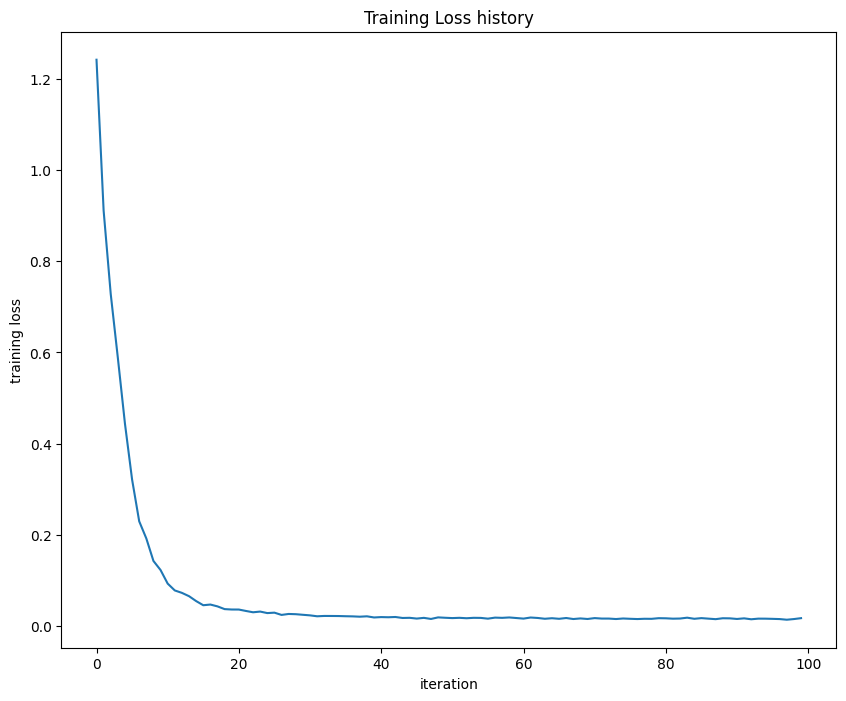

In [6]:
net = init_toy_model()
stats = net.train(X, y, X, y,
            learning_rate=1e-1, reg=5e-6,
            num_iters=100, verbose=False)

print('Final training loss: ', stats['loss_history'][-1])


plt.plot(stats['loss_history'])
plt.xlabel('iteration')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.show()

# Обучение нейронной сети на реальном наборе данных (CIFAR-10, MNIST)

Загрузите набор данных, соответствующий вашему варианту. 

Разделите данные на обучающую, тестовую и валидационную выборки.

Выполните предобработку данных, как в ЛР 1. 

Обучите нейронную сеть на ваших данных. 

При сдаче лабораторной работы объясните значения всех параметров метода train.

In [7]:
from scripts.data_utils import load_CIFAR10
from sklearn.model_selection import train_test_split

cifar10_dir = 'scripts/datasets/cifar-10-batches-py'

X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
X_val = X_val.reshape(X_val.shape[0], -1)

print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)
print('Validate data shape: ', X_val.shape)
print('Validate labels shape: ', y_val.shape)

Training data shape:  (45000, 3072)
Training labels shape:  (45000,)
Test data shape:  (10000, 3072)
Test labels shape:  (10000,)
Validate data shape:  (5000, 3072)
Validate labels shape:  (5000,)


In [8]:
mean_image = np.mean(X_train, axis=0)

X_train -= mean_image
X_val -= mean_image
X_test -= mean_image


print(X_train.shape, X_val.shape, X_test.shape)

(45000, 3072) (5000, 3072) (10000, 3072)


In [16]:
input_size = 32 * 32 * 3
hidden_size = 50
num_classes = 10
net = TwoLayerNet(input_size, hidden_size, num_classes)

stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=1000, batch_size=200,
            learning_rate=1e-4, learning_rate_decay=0.95,
            reg=0.25, verbose=True)

val_acc = (net.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)

iteration 0 / 1000: loss 2.302978
iteration 100 / 1000: loss 2.302503
iteration 200 / 1000: loss 2.299477
iteration 300 / 1000: loss 2.266394
iteration 400 / 1000: loss 2.221647
iteration 500 / 1000: loss 2.184166
iteration 600 / 1000: loss 2.153163
iteration 700 / 1000: loss 2.083011
iteration 800 / 1000: loss 2.057867
iteration 900 / 1000: loss 2.098934
Validation accuracy:  0.268


Используя параметры по умолчанию, вы можете получить accuracy, примерно равный 0.29. 

Проведите настройку гиперпараметров для увеличения accuracy. Поэкспериментируйте со значениями гиперпараметров, например, с количеством скрытых слоев, количеством эпох, скорости обучения и др. Ваша цель - максимально увеличить accuracy полносвязной сети на валидационном наборе. Различные эксперименты приветствуются. Например, вы можете использовать методы для сокращения размерности признакового пространства (например, PCA), добавить dropout слои и др. 

Для лучшей модели вычислите acсuracy на тестовом наборе. 

Для отладки процесса обучения часто помогают графики изменения loss и accuracy в процессе обучения. Ниже приведен код построения таких графиков. 

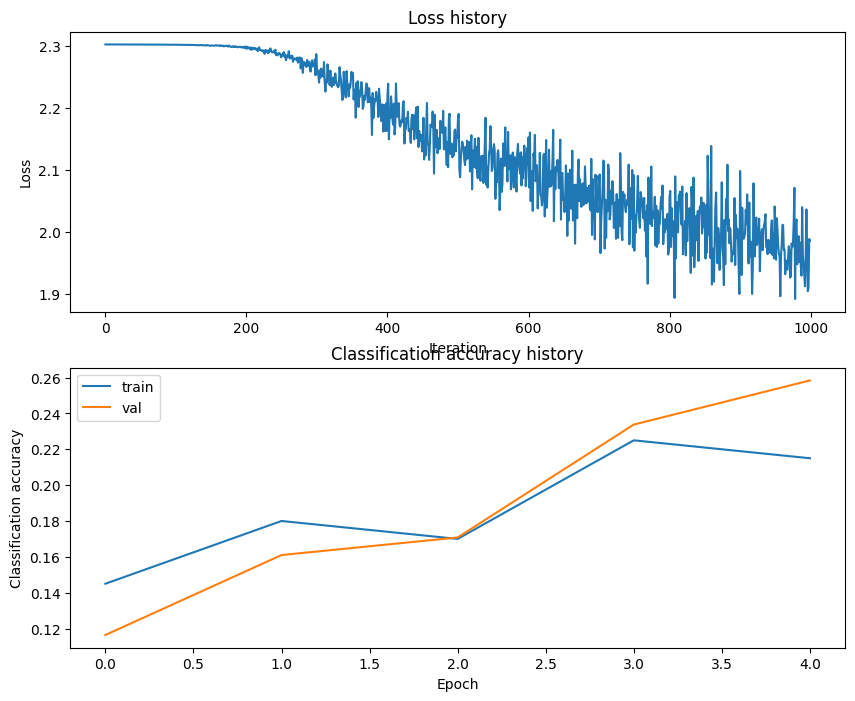

In [17]:
plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.legend()
plt.show()

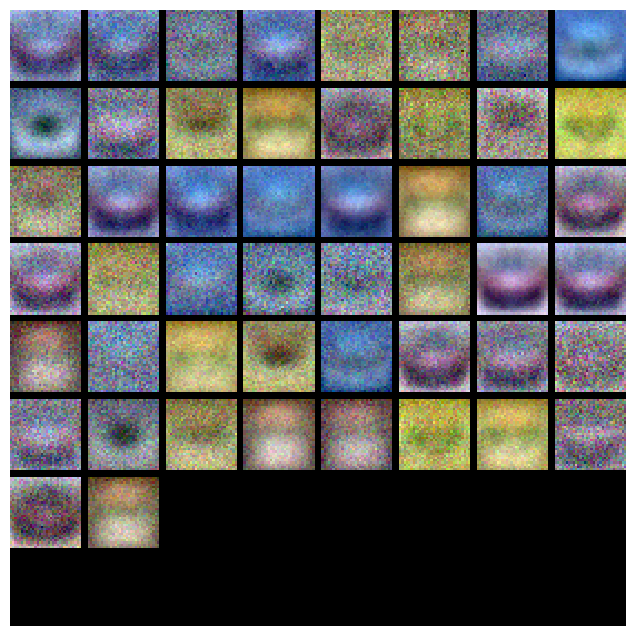

In [18]:
from scripts.vis_utils import visualize_grid

def show_net_weights(net):
    W1 = net.params['W1']
    W1 = W1.reshape(32, 32, 3, -1).transpose(3, 0, 1, 2)
    plt.imshow(visualize_grid(W1, padding=3).astype('uint8'))
    plt.gca().axis('off')
    plt.show()

show_net_weights(net)

In [11]:
import optuna
import warnings

warnings.filterwarnings('ignore', category=RuntimeWarning)


def objective(trial):
    # Hyperparameters to tune
    hidden_size = trial.suggest_int('hidden_size', 8, 256, step=8)
    learning_rate = trial.suggest_float('learning_rate', 1e-5, 1e-2, step=1e-5)
    reg = trial.suggest_float('reg', 1e-4, 1.0, step=1e-4)
    batch_size = trial.suggest_int('batch_size', 64, 512, step=64)
    num_iters = trial.suggest_int('num_iters', 500, 3000, step=500)
    learning_rate_decay = trial.suggest_float('learning_rate_decay', 0.9, 0.99, step=0.001)

    # Initialize model
    net = TwoLayerNet(input_size, hidden_size, num_classes)

    # Train model
    net.train(X_train, y_train, X_val, y_val,
                      num_iters=num_iters, 
                      batch_size=batch_size,
                      learning_rate=learning_rate, 
                      learning_rate_decay=learning_rate_decay,
                      reg=reg, 
                      verbose=False)

    val_acc = (net.predict(X_val) == y_val).mean()
    
    return val_acc


study = optuna.create_study(direction='maximize')
print("Starting optimization...")
study.optimize(objective, n_trials=100, n_jobs=-1, show_progress_bar=True)

[I 2025-12-04 17:51:20,554] A new study created in memory with name: no-name-4d600cc1-ce95-43dd-bf72-cbb8b32d2936


Starting optimization...


  0%|          | 0/100 [00:00<?, ?it/s]

[I 2025-12-04 17:51:48,182] Trial 14 finished with value: 0.104 and parameters: {'hidden_size': 256, 'learning_rate': 0.00507, 'reg': 0.6311, 'batch_size': 448, 'num_iters': 500, 'learning_rate_decay': 0.978}. Best is trial 14 with value: 0.104.
[I 2025-12-04 17:51:56,628] Trial 2 finished with value: 0.4524 and parameters: {'hidden_size': 88, 'learning_rate': 0.0010400000000000001, 'reg': 0.9148000000000001, 'batch_size': 192, 'num_iters': 1000, 'learning_rate_decay': 0.9510000000000001}. Best is trial 2 with value: 0.4524.
[I 2025-12-04 17:52:03,373] Trial 1 finished with value: 0.4666 and parameters: {'hidden_size': 240, 'learning_rate': 0.00151, 'reg': 0.5803, 'batch_size': 192, 'num_iters': 1000, 'learning_rate_decay': 0.9610000000000001}. Best is trial 1 with value: 0.4666.
[I 2025-12-04 17:52:05,207] Trial 13 finished with value: 0.0952 and parameters: {'hidden_size': 8, 'learning_rate': 0.00533, 'reg': 0.2553, 'batch_size': 128, 'num_iters': 2000, 'learning_rate_decay': 0.988}.

In [19]:
trial = study.best_trial
print(f"Best trial Accuracy: {trial.value}")
print("Params:")
for key, value in trial.params.items():
    print(f"{key}: {value}")


best_params = trial.params
best_net = TwoLayerNet(input_size, best_params['hidden_size'], num_classes)

stats = best_net.train(X_train, y_train, X_val, y_val,
                    num_iters=best_params['num_iters'],
                    batch_size=best_params['batch_size'],
                    learning_rate=best_params['learning_rate'],
                    learning_rate_decay=best_params['learning_rate_decay'],
                    reg=best_params['reg'],
                    verbose=True)

test_acc = (best_net.predict(X_test) == y_test).mean()
print(f"Test Accuracy with best params: {test_acc}")

Best trial Accuracy: 0.5018
Params:
hidden_size: 168
learning_rate: 0.0012900000000000001
reg: 0.5595
batch_size: 448
num_iters: 2000
learning_rate_decay: 0.918
iteration 0 / 2000: loss 2.305459
iteration 100 / 2000: loss 1.789044
iteration 200 / 2000: loss 1.681493
iteration 300 / 2000: loss 1.635042
iteration 400 / 2000: loss 1.603161
iteration 500 / 2000: loss 1.631457
iteration 600 / 2000: loss 1.561992
iteration 700 / 2000: loss 1.520495
iteration 800 / 2000: loss 1.506463
iteration 900 / 2000: loss 1.504368
iteration 1000 / 2000: loss 1.522932
iteration 1100 / 2000: loss 1.534376
iteration 1200 / 2000: loss 1.529733
iteration 1300 / 2000: loss 1.549049
iteration 1400 / 2000: loss 1.424439
iteration 1500 / 2000: loss 1.596573
iteration 1600 / 2000: loss 1.621596
iteration 1700 / 2000: loss 1.557019
iteration 1800 / 2000: loss 1.425208
iteration 1900 / 2000: loss 1.525551
Test Accuracy with best params: 0.5073


Сделайте выводы по результатам работы. 

Благодаря подбору метрик удалось достичь существенного роста точности (с 0.268 до 0.507)